In [73]:
import pandas as pd
import numpy as np
#from datetime import datetime

In [74]:
# read in relevant cols, convert timestamp col to datetime
cols = pd.read_csv("phq_scores_niaaa_20230715.csv", nrows=1).columns
df = pd.read_csv("phq_scores_niaaa_20230715.csv", usecols=cols[1:])
#df['timestamp'] = df['timestamp'].apply(lambda x: datetime.strptime(x.split('.')[0], '%Y-%m-%dT%H:%M:%S'))
#df['timestamp'] = df['timestamp'].apply(lambda x: np.datetime64(x))
df['timestamp'] = df['timestamp'].apply(lambda x: pd.to_datetime(x))

# fix typos
df.replace({'C102AUD':'CF102AUD','Mm095AUD':'MM095AUD','CM085 AUD':'CM085AUD','Mf087AUD':'MF087AUD','Mm119AUD':'MM119AUD'}, inplace=True)

# remove invalid pts
nonvalid = ['CF270AUD','CF285AUD','CF286AUD','CM229AUD','CM236AUD','CM237AUD','CM251AUD','CM256AUD','CM271AUD','CM287AUD','CM301AUD','MF246AUD','MF249AUD','MF272AUD','MM216AUD','MM250AUD','MM260AUD','MM282AUD','MM293AUD']
#drop_list = ['CM236AUD','CM256AUD','MM293AUD']
drop_indices = df.loc[df['subject_id'].isin(nonvalid),'subject_id'].index
df.drop(drop_indices)

df

,user_id,subject_id,timestamp,survey_name,phq_total
0,us-east-1:00c110a8-18fa-4ab9-ba23-474b1f809359,MM293AUD,2023-01-30 18:38:57.101000+01:00,phq8,2
1,us-east-1:00f63ac3-c54e-4e76-897b-e1dc68cb72d9,CM236AUD,2022-12-21 10:04:08.550000-08:00,phq8,0
2,us-east-1:00f63ac3-c54e-4e76-897b-e1dc68cb72d9,CM236AUD,2023-01-05 13:44:03.620000-08:00,phq8,1
3,us-east-1:00f63ac3-c54e-4e76-897b-e1dc68cb72d9,CM236AUD,2023-01-21 08:03:52.336000+01:00,phq8,2
4,us-east-1:00f63ac3-c54e-4e76-897b-e1dc68cb72d9,CM236AUD,2023-02-01 16:39:49.721000+01:00,phq8,0
...,...,...,...,...,...
731,us-east-1:f8452db9-2ae8-4b94-8dd4-ff8ea21d3235,MF035AUD,2022-03-20 22:08:50.675000-06:00,phq8,6
732,us-east-1:fc5296f1-c47a-42c6-93ef-13e9d3a8af5c,CM059AUD,2021-12-30 22:01:00.356000-07:00,phq8,5
733,us-east-1:fc5296f1-c47a-42c6-93ef-13e9d3a8af5c,CM059AUD,2022-01-13 14:48:58.558000-07:00,phq8,2
734,us-east-1:fc5296f1-c47a-42c6-93ef-13e9d3a8af5c,CM059AUD,2022-01-27 08:51:52.652000-07:00,phq8,3


In [75]:
# read in basline date reference
df_ref = pd.read_csv("HealthRhythmsAUDCTSI-BaselineDates_DATA_2023-07-27_1631.csv")
#df_ref.dropna(inplace=True)
df_ref = df_ref.loc[df_ref['record_id'] != 'PM142AUD']
#df_ref['visit_date'] = df_ref['visit_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
#df_ref['visit_date'] = df_ref['visit_date'].apply(lambda x: np.datetime64(x))
df_ref['visit_date'] = df_ref['visit_date'].apply(lambda x: pd.to_datetime(x))

In [76]:
def get_study_week(row):
    baseline_date = pd.to_datetime(df_ref.loc[df_ref['record_id']==row['subject_id'],['visit_date']].values[0][0]).date()
    date_of_interest = row['timestamp'].date()
    td = date_of_interest-baseline_date
    return round(td.days/7,0), td.days

#get_study_week(df.iloc[0])

In [77]:
for i, row in df.iterrows():
    try:
        df.loc[df.index[i],"study_week"], df.loc[df.index[i],"study_days"] = get_study_week(row)
    except:
        df.loc[df.index[i],"study_week"], df.loc[df.index[i],"study_days"] = np.nan, np.nan

In [78]:
df.loc[df['study_days'].isna()]

,user_id,subject_id,timestamp,survey_name,phq_total,study_week,study_days
331,us-east-1:738c17d3-a1e2-434c-b982-357b48768331,CM106AUD,2022-02-18 14:11:55.782000-07:00,phq8,4,NaN,NaN
332,us-east-1:738c17d3-a1e2-434c-b982-357b48768331,CM106AUD,2022-03-03 10:11:52.588000-07:00,phq8,6,NaN,NaN
333,us-east-1:738c17d3-a1e2-434c-b982-357b48768331,CM106AUD,2022-03-20 09:53:10.367000-06:00,phq8,5,NaN,NaN
334,us-east-1:738c17d3-a1e2-434c-b982-357b48768331,CM106AUD,2022-04-02 14:06:46.940000-06:00,phq8,3,NaN,NaN
335,us-east-1:738c17d3-a1e2-434c-b982-357b48768331,CM106AUD,2022-04-16 14:41:25.768000-06:00,phq8,2,NaN,NaN
336,us-east-1:738c17d3-a1e2-434c-b982-357b48768331,CM106AUD,2022-04-30 16:46:49.444000-06:00,phq8,4,NaN,NaN
337,us-east-1:738c17d3-a1e2-434c-b982-357b48768331,CM106AUD,2022-05-14 17:41:51.146000-06:00,phq8,1,NaN,NaN
620,us-east-1:ddb6b068-a2df-49a7-9720-c9ad39e2fb55,CF333AUD,2023-05-26 13:44:49.198000-04:00,phq8,5,NaN,NaN
625,us-east-1:e3423726-2124-4fba-ae5d-449c8abab021,CM250AUD,2023-01-05 09:07:49.858000+01:00,phq8,10,NaN,NaN
626,us-east-1:e3423726-2124-4fba-ae5d-449c8abab021,CM250AUD,2023-01-13 23:18:30.925000+01:00,phq8,6,NaN,NaN


In [79]:
test1 = df.loc[(df['study_week']==0) | (df['study_week']==1),'subject_id'].values

<Axes: title={'center': 'No. PHQ8 Completed (pre-2/6/23)'}, xlabel='Week', ylabel='Count'>

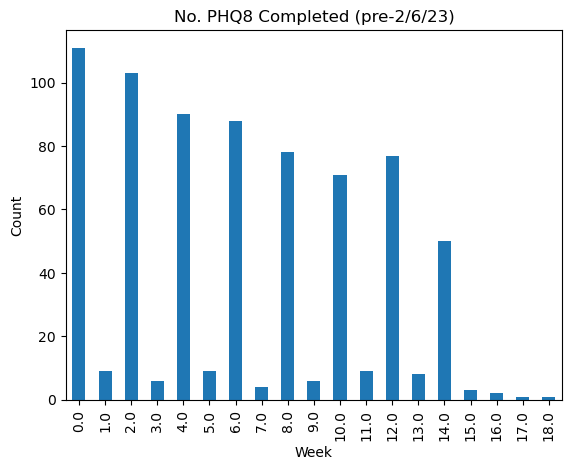

In [80]:
count_by_week = df['study_week'].value_counts()
count_by_week.sort_index(inplace=True)
count_by_week.plot(kind='bar', xlabel="Week", ylabel='Count', title='No. PHQ8 Completed (pre-2/6/23)')

In [81]:
# count_by_day = df['study_days'].value_counts()
# count_by_day.sort_index(inplace=True)
# count_by_day.plot(kind='bar')

In [82]:
observed_count = count_by_week.reset_index().rename(columns={'index':'week','study_week':'count'})
for i, row in observed_count.iterrows():
    if i<14:
        if i%2==0:
            observed_count.loc[observed_count.index==i,'count'] = observed_count.loc[observed_count.index==i,'count'].values[0] + observed_count.loc[observed_count.index==i+1,'count'].values[0]
        elif i%2!=0:
            observed_count.drop(i,inplace=True)
    elif i==14:
        observed_count.loc[observed_count.index==i,'count'] = observed_count.loc[observed_count.index==i,'count'].values[0] + observed_count.loc[observed_count.index==i+1,'count'].values[0] 
        + observed_count.loc[observed_count.index==i+2,'count'].values[0] + observed_count.loc[observed_count.index==i+3,'count'].values[0] + observed_count.loc[observed_count.index==i+4,'count'].values[0]
    else:
        observed_count.drop(i,inplace=True)


observed_count

,week,count
0,0.0,120
2,2.0,109
4,4.0,99
6,6.0,92
8,8.0,84
10,10.0,80
12,12.0,85
14,14.0,53


In [83]:
# get all events pre feb6
events_pre = pd.read_csv('events_pre_20230206.csv')
expected_count = events_pre['event_name'].value_counts().reset_index().rename(columns={'index':'event_name','event_name':'count'})
expected_count.drop([1,3,5,7,9,11,13],inplace=True)
expected_count

,event_name,count
0,baseline,105
2,week_2,99
4,week_4,93
6,week_6,89
8,week_8,87
10,week_10,85
12,week_12,83
14,week_14,82


In [84]:
test2 = events_pre['record_id'].unique()

In [85]:
len(test1)

120

In [86]:
len(test2)

105